<a href="https://colab.research.google.com/github/Praaathaamesh/DL-API-Management/blob/main/Config/CDSS_DL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CDSS EDA Pipeline**
_Author: Prathamesh Pradeep Jadhav_

## Implicative Purpose
- Here, the PTBXL dataset offers a generalised dataset, in order to detect the entries which are susceptible to ALVF, a lot of data wrangling and normalisation is needed.
- Supplimentary to the [CDSS Data Pipeline](https://colab.research.google.com/drive/1cZh8ZN37DhDbpAksMTCCiwcITU15-sPW) notebook, this notebook offers an exploratory view of entire data with increased emphasis on above said entries.
- The main purpose of this notebook is to provide enough data-based evidence required to change simple LVH entries into HYP_LVH_ALVF entries - which ultimately backs up the literature-based evidence.
- A part of a broader project involving creation of clinical decision support system for diagnosis of ALVF caused by CM, leading to untimely/unforseen cardiac arrest.
- To streamline the data integration and pre-processing step for model training using PTB-XL dataset.
- Further inclusions are yet to be made.
- This file will undergo series of multiple modification throughout the course of this project.
- Decisions will be made based upon the final data product architecture.

## Usage Terms

- Notebook will be used for temporal basis to analyse the efficiency. Later can be sampled into a sufficable package/module or even a software
- Suggestive use must be of the academic cases only.

## Considerations

- Under the management of subsequent repository and MIT license.
- Implementation is yet to be done.

<br>

## External Links

- [CDSS-DL API Management Repository](https://github.com/Praaathaamesh/DL-API-Management)
****

## **Import Important Packages**



In [ ]:
import pickle
import os
import sys
import math
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.typing import LineStyleType

In [ ]:
# ATTENTION: RUN THIS BLOCK TO MOUNT THE GOOGLE DRIVE STORAGE WITHOUT DIRECT AUTHORISATION (EVADES PESKY AUTHORISATION MAIL SPAM)

# Mount the drive (Auto authorisation)
# from google.colab import auth
# auth.authenticate_user()
# from google.auth import default
# creds, _ = default()
# drive.mount('/content/drive')

## **Load the Pickled Data**


### _What does pickling a variable means?_
  - Basically, creating a storable form of your variable using package named `pickle` in Python, available via pip.
- Syntax:
  - following code block opens and reads the pickled data first and then loads it.
  - Run following command to install and import package in your workspace:

  > ```!pip install pickle```
  
  Note: using this package in Colab is simple and requires no installation.
  ```python
  import pickle
  ```

In [ ]:
# Loading signal and metadata

with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/X.pkl", 'rb') as f: # read signal data
  X = pickle.load(f)

with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/Y.pkl", 'rb') as f: # read metadata
  Y = pickle.load(f)


## **Data Overview**

- Consider **metadata only**; sole signal data is basically a NumPy array.
- Analyse the trends and metrics
- Understand the variablities

In [ ]:
# visualise first 5 datapoints/entries
Y.head(5)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


In [ ]:
# visualise last 5 datapoints/entries
Y.tail(5)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]
21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,supraventrikulÄre extrasystole(n) sinusrhythmu...,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,[NORM]
21837,11744.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-11 16:43:01,sinusrhythmus p-sinistrocardiale lagetyp norma...,...,NaN,", I-AVL,",NaN,NaN,NaN,NaN,9,records100/21000/21837_lr,records500/21000/21837_hr,[NORM]


In [ ]:
# shape of metadata
Y.shape

(21799, 28)

In [ ]:
# columns of metadata
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'diagnostic_superclass'],
      dtype='object')

In [ ]:
# information regarding metadata
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 1 to 21837
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21799 non-null  float64
 1   age                           21799 non-null  float64
 2   sex                           21799 non-null  int64  
 3   height                        6974 non-null   float64
 4   weight                        9421 non-null   float64
 5   nurse                         20326 non-null  float64
 6   site                          21782 non-null  float64
 7   device                        21799 non-null  object 
 8   recording_date                21799 non-null  object 
 9   report                        21799 non-null  object 
 10  scp_codes                     21799 non-null  object 
 11  heart_axis                    13331 non-null  object 
 12  infarction_stadium1           5612 non-null   object 
 13  infarc

- Here, metadata consists total of 21799 entries or patients.
- Also, 28 unique columns:
  - Most columns consist of objects are their elemental datatype, **making it difficult to parse and obtain data from.**
  - Columns such as `age, sex, filename_lr, filename_hr, diagnostic_superclass, scp_codes` will be of utmost importance here.

In [ ]:
# Signal data is np.array
# filename column in metadata references the signal data
X[0]

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

- Signal data can be used to plot the actual ECG using `wfdb` package.
- Here the signal data is simply a NumPy array consisting individual lists with float64 as sub-elements.

## **Exploratory Data Analysis**



### _Present Unique Records_

In [ ]:
# find unique patient IDs
unique_patient_ids = Y.patient_id.unique()
print(f"There are in-total {len(unique_patient_ids)} patients.")
print(f"In literature, There has to be total in-total 18885 patients.")

There are in-total 18869 patients.
In literature, There has to be total in-total 18885 patients.


- There's lost difference of 16 entries in calculated number of unique patients with respect to the number mentioned in the literature.
- This difference is due to **minor data curation, filtered specific records (ones without the labels and tags), typographic error** in one of the publications regarding the dataset.
- The actual number is **18869; _not_ 18885**!

Total of 16244 records have 1 diagnostic superclass(es)
-----------------------------------------------------------

Total of 4068 records have 2 diagnostic superclass(es)
-----------------------------------------------------------

Total of 919 records have 3 diagnostic superclass(es)
-----------------------------------------------------------

Total of 411 records have 0 diagnostic superclass(es)
-----------------------------------------------------------

Total of 157 records have 4 diagnostic superclass(es)
-----------------------------------------------------------



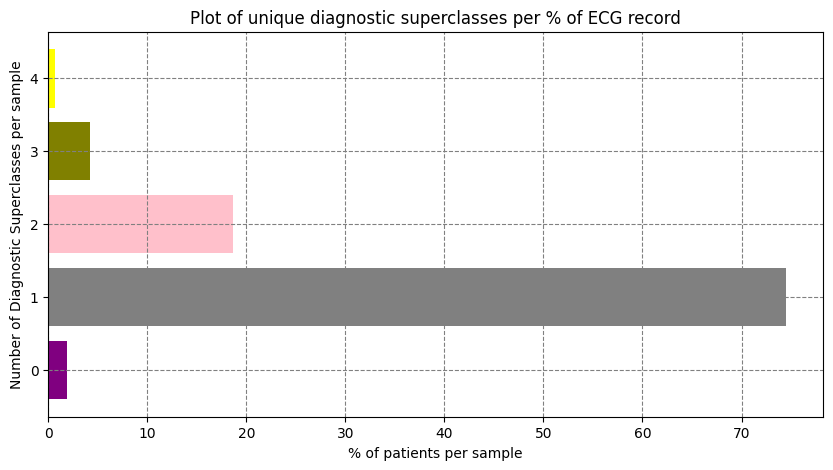

In [ ]:
# finding unique diagnostic superclasses per ECG record
Unique_DS_lens = Y.diagnostic_superclass.apply(len) # df of n(DS) per n(ECG ID)

Num_Entries = Unique_DS_lens.value_counts().values # separate n(ECG ID)
Num_DSCount = Unique_DS_lens.value_counts().keys() # separate n(DS)

# iterate both usign zip
for entries, counts in zip(Num_Entries,Num_DSCount):
  print(f"Total of {entries} records have {counts} diagnostic superclass(es)")
  print("-----------------------------------------------------------\n")

# generating Graph
plt.figure(figsize=(10,5))
colours = ["grey","pink","Olive","Purple","Yellow"]
plt.barh(Num_DSCount,(Num_Entries/(len(Y.diagnostic_superclass))*100), color = colours)
plt.ylabel("Number of Diagnostic Superclasses per sample")
plt.xlabel("% of patients per sample")
plt.title("Plot of unique diagnostic superclasses per % of ECG record")
plt.grid(color = "grey", linestyle = "--")
plt.show()

- Most records have single diagnosis. Very few records are diagnosed with 4 conditions.
- About 411 records have no diagnosis because, **Most of the entries or records are of high quality, yet there are some entries which have missing metadata.**
- To fix this, the attached literature has suggested validation using **10-folds cross validation** using `strat_fold` column depicting the bins on entries ranging from 0-10 - obtained via stratified sampling method.

### _How AGE and SEX Affects the Data?_

In [ ]:
# Finding the age vs sex variation

# merge columns as df
Age_ValList = Y.age.values
Sex_ValList = Y.sex.values

age_sex_df = pd.DataFrame({"age":Age_ValList, "sex":Sex_ValList})
age_sex_df['sex'] = age_sex_df['sex'].astype('category').cat.rename_categories({0: 'female', 1: 'male'}) # 0 and 1 to female and male

# Parsing/extracting gender specific entries
male = list()
female = list()

# making a function for it
def parse_n_extract(iter: pd.DataFrame):
  for entries in range(0, (len(iter)-1)):
    Single_Entry = iter.iloc[entries] # getting single entry
    if Single_Entry.sex == "male":
      male.append(Single_Entry.age)
    elif Single_Entry.sex == "female":
      female.append(Single_Entry.age)
    else:
      print("Merge Error")

parse_n_extract(age_sex_df)

# Overview
print(f"Total number of male patients: {len(male)}\n")
print(f"Total number of female patients: {len(female)}\n")

Total number of male patients: 10445

Total number of female patients: 11353



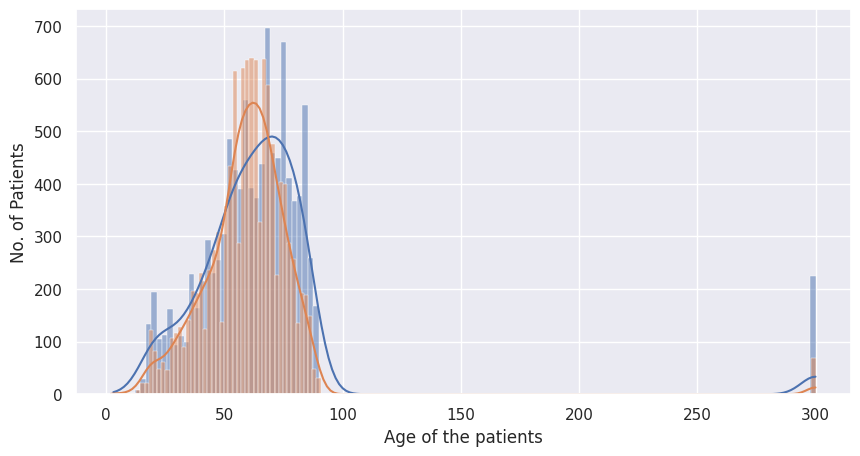

In [ ]:
# Visualising distribution of both sex as per their age ad number of records
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
styledict = {"linewidth" : 0.3,
             "kde" :True}
male_hist = sns.histplot(data = male, **styledict)
male_hist.set(xlabel = "Age of the patients", ylabel = "No. of Patients")
female_hist = sns.histplot(data = female, **styledict)
plt.show()

- One noticable aspect of the above graph is: **massive valley of no bars elevated till the tick of 300, representing the age of patients being 300 years old!**
- Despite being unrealistic, such metric exists solely in data to represent the entries which have the **age above 89 years old**. Hence, it is suitable to ignore these entries.
- Both graph suggest that, CVDs are more prominent in late middle age or early elderly period of their life.
- Looking at the distribution plot of men, the curve is slightly skewed to right -- representing the occurance of this diseases in late stages of life.
- Whereas in case of women, the curve is basically normally disributed near the age of 50-60 years of age - representing their occurance in late middle ages.

### _Men or Women: At Which Age the Proportion is Higher? (P1)_

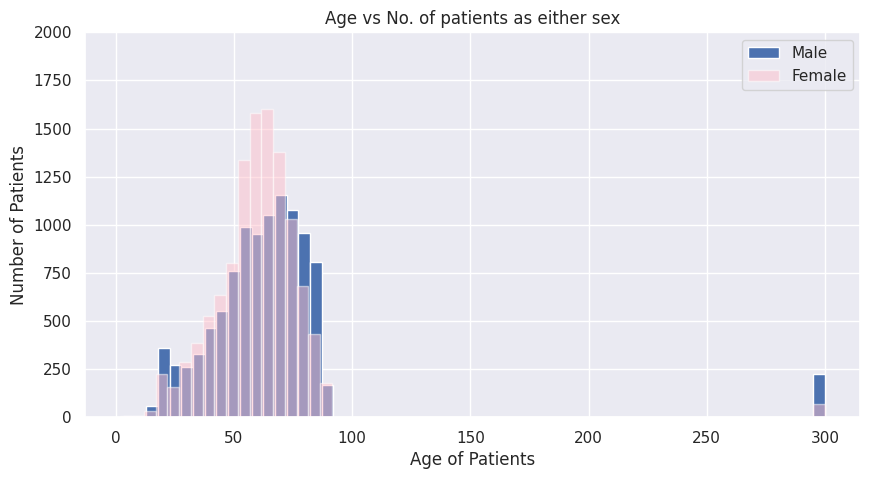

In [ ]:
# Finding the trend Age vs Patient Number as either sex
plt.figure(figsize=(10,5))
plt.hist(male,
         label = "Male",
         bins=60)
plt.hist(female,
         label = "Female",
         color = "pink",
         alpha = 0.5,
         bins = 60)
plt.legend()
plt.ylabel("Number of Patients")
plt.xlabel("Age of Patients")
plt.ylim(0,2000)
plt.xticks(np.arange(0, max(male)+10, 10), minor = True)
plt.title("Age vs No. of patients as either sex")
plt.show()

- In a gist, above chart represents the initial increased proportion of female cases of CVD compared to males, especially in the range of 25-50 years old.
- Moreover, massive elevation (>1600 cases) in the magnititude is apparent for the cases within the age range of 55-70 years old (late middle ages - early late life).
- Whereas, in comparison of women suffering from CVDs, in the extreme ages of life, males are more affected -- despite have more than 1000s of cases in age range of 55-70 years old.

### _Everything About Diagnostic Superclasses_


- This section is all about analysing the variations in data due to different diagnostic superclasses.
- The approach will begin by finding number or proportion of patients per diagnostic superclass and will narrow down to finding the records/entries which have elevated risks for developing **Left Ventricular Hypertrophic Cardiomypathy induced Asymptomatic Left Ventricular Failure (LVH-ALVF)**

In [ ]:
# Finding number or proportion of patients per diagnostic superclass

ds_valuecounts = pd.Series(Y.diagnostic_superclass.value_counts())
ds_valuecounts

,count
diagnostic_superclass,
[NORM],9069
[MI],2532
[STTC],2400
[CD],1708
"[CD, MI]",1297
"[STTC, HYP]",781
"[STTC, MI]",599
[HYP],535
[],411


In [ ]:
# Extracting Single labels in list
Diagnostic_labels = []

for entries in ds_valuecounts.keys():
  if len(entries) == 1:
    Diagnostic_labels.append(entries[0])
  elif entries == []:
    Diagnostic_labels.append("No Diagnosis")

print(f"These are the major singular diagnostic labels:\n{Diagnostic_labels}")

These are the major singular diagnostic labels:
['NORM', 'MI', 'STTC', 'CD', 'HYP', 'No Diagnosis']


In [ ]:
# Extracting counts of the single labels in a list
Diagnostic_counts = []

for entries in range(0, (len(ds_valuecounts)-1)):

  int_single_value_count = int(ds_valuecounts.iloc[entries]) # ValCount of one entry
  single_ds_list = ds_valuecounts.keys()[entries] # DS list of one entry

  if len(single_ds_list) == 1: # if has 1 ds str
    Diagnostic_counts.append(int_single_value_count) # add it to list
  elif len(single_ds_list) == 0:# if has 0 ds str
    Diagnostic_counts.append(int_single_value_count) # add it to list

print(f"These are the major singular diagnostic counts for above mentioned labels:\n{Diagnostic_counts}")

These are the major singular diagnostic counts for above mentioned labels:
[9069, 2532, 2400, 1708, 535, 411]


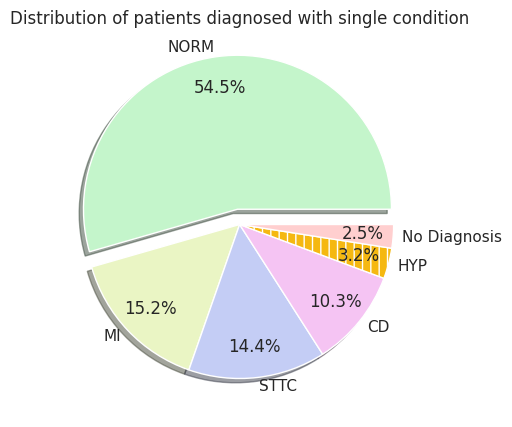

In [ ]:
# Visualising via pie chart

plt.figure(figsize = (10,5))
plt.pie(Diagnostic_counts,
        labels = Diagnostic_labels,
        autopct="%1.1f%%",
        shadow = True,
        explode = (0.1, 0, 0, 0, 0, 0),
        pctdistance = 0.8,
        labeldistance=1.06,
        colors = ["#c4f5cb",
                  "#eaf5c4",
                  "#c4cdf5",
                  "#f5c4f3",
                  "#f5b811",
                  "#ffcfcf"],
        hatch = [None,None,None,None, "||",None])
plt.title("Distribution of patients diagnosed with single condition")
plt.show()

Only **535** records have single diagnosis of HYP (Hypertrophic Cardiomyopathy), i.e. **3.2%** of all the single labelled values.

### _Everything About HYP_

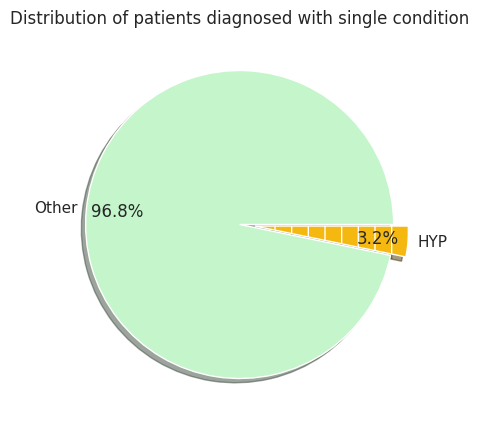

In [ ]:
# Visualising total proportion of single diagnosed HYP via pie chart
Diagnostic_counts_Other = [(sum(Diagnostic_counts)-Diagnostic_counts[-2]), Diagnostic_counts[-2]] # all-hyp and hyp

plt.figure(figsize = (10,5))
plt.pie(Diagnostic_counts_Other,
        labels = ['Other', 'HYP'],
        autopct="%1.1f%%",
        shadow = True,
        explode = (0, 0.1),
        pctdistance = 0.8,
        labeldistance=1.06,
        colors = ["#c4f5cb",
                  "#f5b811"],
        hatch = [None, "|"])
plt.title("Distribution of patients diagnosed with single condition")
plt.show()

Only **535** records have single diagnosis of HYP (Hypertrophic Cardiomyopathy), i.e. **3.2%** of all the single labelled entries.

In [ ]:
# finding the number of entries with at least one HYP diagnosis
HYP_count = []

for entries in range(0,(len(ds_valuecounts))):

  lenvar = int(ds_valuecounts.iloc[entries]) # 1 valcount

  if 'HYP' in ds_valuecounts.keys()[entries]: # if hyp in list of ds of 1 entry
    HYP_count.append(lenvar) # add it

Total_HYP_count = sum(HYP_count)

print(f"Total number of patients diagnosed at least with one HYP statement: {Total_HYP_count}")

Total number of patients diagnosed at least with one HYP statement: 2649


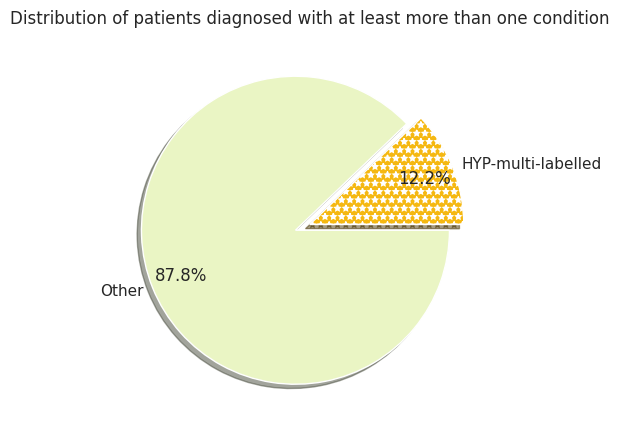

In [ ]:
# Visualising total proportion of more than one diagnosed HYP via pie chart
Diagnostic_counts_HYP_many = [Total_HYP_count, (len(Y.patient_id)- Total_HYP_count)] # hyp and all-hyp

plt.figure(figsize = (10,5))
plt.pie(Diagnostic_counts_HYP_many,
        labels = ['HYP-multi-labelled', 'Other'],
        autopct="%1.1f%%",
        shadow = True,
        explode = (0, 0.1),
        pctdistance = 0.8,
        labeldistance=1.06,
        colors = ["#f5b811",
                  "#eaf5c4"],
        hatch = ["**", None])
plt.title("Distribution of patients diagnosed with at least more than one condition")
plt.show()

- Only **2649** records have **at least more than one diagnosis of conditions other than HYP** (Hypertrophic Cardiomyopathy), i.e. **12.2%** of all the multi-labelled entries.

### _In Search of LVH-ALVF_

In [ ]:
# Finding how many of those HYP entries are of LVH
HYP_LVH_df = pd.DataFrame()

lenvar = (len(Y.patient_id) - 1) # total entries

for entries in range(0,lenvar):
  if 'HYP' in Y.iloc[entries].diagnostic_superclass:
    if 'LVH' in Y.iloc[entries].scp_codes: # hyp in ds and lvh in scp codes
      HYP_LVH_df = pd.concat([HYP_LVH_df, Y.iloc[entries].to_frame().T], ignore_index=True) # add entries row-by-row

HYP_LVH_df.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
0,19053.0,25.0,0,NaN,83.0,2.0,0.0,CS-12 E,1985-02-02 09:30:29,sinusrhythmus unspezifischer intraventrikulÄre...,...,", II-AVL,AVF",NaN,NaN,NaN,NaN,NaN,9,records100/00000/00030_lr,records500/00000/00030_hr,[HYP]
1,21698.0,31.0,0,NaN,62.0,2.0,0.0,CS-12 E,1985-12-02 12:13:46,sinusrhythmus unspezifische intraventrikulÄre ...,...,NaN,", I-AVL,",NaN,NaN,1ES,NaN,1,records100/00000/00096_lr,records500/00000/00096_hr,[HYP]
2,16066.0,38.0,0,NaN,75.0,0.0,0.0,CS-12 E,1985-12-13 10:24:09,sinusrhythmus mÄssige amplitudenkriterien f#r ...,...,NaN,", I-AVF,",NaN,NaN,NaN,NaN,5,records100/00000/00106_lr,records500/00000/00106_hr,"[HYP, MI]"
3,8727.0,74.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-02-22 14:52:46,sinusrytm vÄnster kammarhypertrofi,...,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00138_lr,records500/00000/00138_hr,[HYP]
4,9780.0,85.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-07 06:22:16,sinusrytm extrem vÄnster el-axel ospecifikt sk...,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00162_lr,records500/00000/00162_hr,"[CD, HYP, STTC, MI]"


In [ ]:
print(f"The total number of HYP and LVH diagnosed entries is {len(HYP_LVH_df)}!")

The total number of HYP and LVH diagnosed entries is 2132!


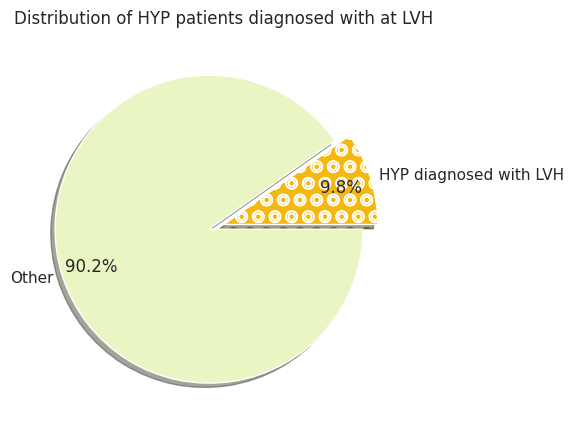

In [ ]:
# Visualising total proportion of LVH diagnosed HYP via pie chart
Diagnostic_counts_HYP_LVH = [len(HYP_LVH_df), (len(Y.patient_id)-len(HYP_LVH_df))] #hyplvh and all- hyplvh

plt.figure(figsize = (10,5))
plt.pie(Diagnostic_counts_HYP_LVH,
        labels = ['HYP diagnosed with LVH', 'Other'],
        autopct="%1.1f%%",
        shadow = True,
        explode = (0, 0.1),
        pctdistance = 0.8,
        labeldistance=1.06,
        colors = ["#f5b811",
                  "#eaf5c4"],
        hatch = ["oO",None])
plt.title("Distribution of HYP patients diagnosed with at LVH")
plt.show()

Out of all entries diagnosed with HYP, only **9.8% (2132)** are diagnosed with LVH!

In [ ]:
# finding entries with suitable form statements representing ALVF
ALVF_Form_Statements = ["VCLVH", "STD", "STE",
                        "LVOLT", "HVOLT", "INVT"]
total_states = [0]*6 # list of 6 zeros

for state in range(0,6): # len(ALVF_Form_Statements) = 6
  for entries in range(0, 2132): # len(all entries)
    if ALVF_Form_Statements[state] in HYP_LVH_df['scp_codes'][entries]: # check state in scp code column of each entry
      total_states[state] += 1

for i in range(0,6): # len(ALVF_Form_Statements) = 6
  print(f"There are total {total_states[i]} LVH entries with {ALVF_Form_Statements[i]} form statement!")
  if total_states[i] == 0:
    print(f"ATTENTION: There are NO entries for LVH patients with {ALVF_Form_Statements[i]} form statement!")
  print("----------------------------------------------------\n")

There are total 653 LVH entries with VCLVH form statement!
----------------------------------------------------

There are total 0 LVH entries with STD form statement!
ATTENTION: There are NO entries for LVH patients with STD form statement!
----------------------------------------------------

There are total 0 LVH entries with STE form statement!
ATTENTION: There are NO entries for LVH patients with STE form statement!
----------------------------------------------------

There are total 2 LVH entries with LVOLT form statement!
----------------------------------------------------

There are total 17 LVH entries with HVOLT form statement!
----------------------------------------------------

There are total 97 LVH entries with INVT form statement!
----------------------------------------------------



In [ ]:
# finding entries with suitable form statements representing ALVF

ALVF_df = pd.DataFrame()
VCLVHcount = 0

for state in range(0,6):
  for entries in range(0, 2132):
    if ALVF_Form_Statements[state] in HYP_LVH_df['scp_codes'][entries]: # check state in scp code column of each entry
      ALVF_df = pd.concat([ALVF_df, HYP_LVH_df.iloc[entries].to_frame().T], ignore_index=True) # create ALVF only entry df

In [ ]:
print(f"There are total {len(ALVF_df)} LVH entries running the risk of ALVF!")

There are total 769 LVH entries running the risk of ALVF!


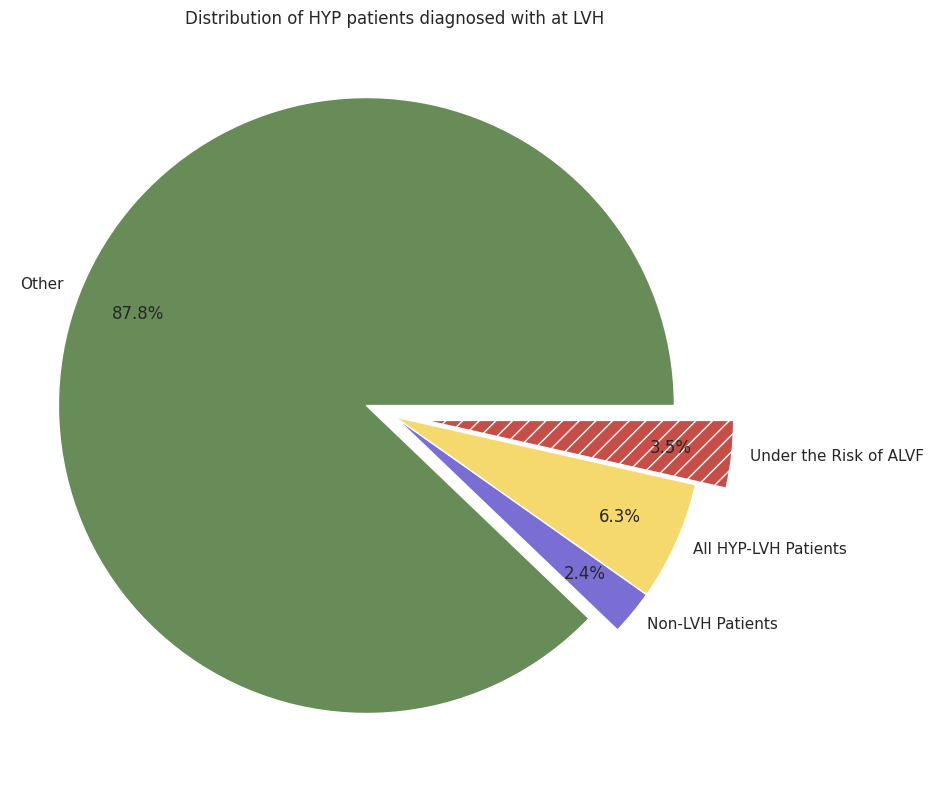

In [ ]:
# Visualising total proportion of ALVF-risk-prone LVH entries compared to all the entries

Pie_Total_proportion = [(len(Y.patient_id)-(Total_HYP_count)), # other
                        ((Total_HYP_count)-len(HYP_LVH_df)), # non lvh
                        (len(HYP_LVH_df)-len(ALVF_df)), # all hyp-lvh
                        len(ALVF_df)] # under ALVF risk

plt.figure(figsize = (10,10))
plt.pie(Pie_Total_proportion,
        labels = ['Other','Non-LVH Patients','All HYP-LVH Patients', "Under the Risk of ALVF"],
        autopct="%1.1f%%",
        shadow = False,
        explode = (0.1, 0, 0, 0.1),
        pctdistance = 0.8,
        labeldistance=1.06,
        colors = ["#688c57",
                  "#7a6ed4",
                  "#f5d96c",
                  "#c74e46"],
        hatch = [None,
                 None,
                 None,
                 "//"])
plt.title("Distribution of HYP patients diagnosed with at LVH")
plt.show()

- Only 3.5% patients have susceptibility towards potential ALVF.
- We can focus more on entries like these while training the model.
- Choosing this subset for solely training the model is a **flaude** idea, because we are creating much bias in training, hence model won't perform well in testing phase, since most of the test modules will have alot of variance.

**Attention-based training to these entries will be a solution for better performance.**

### _Men or Women: At Which Age the Proportion is Higher? (P2)_

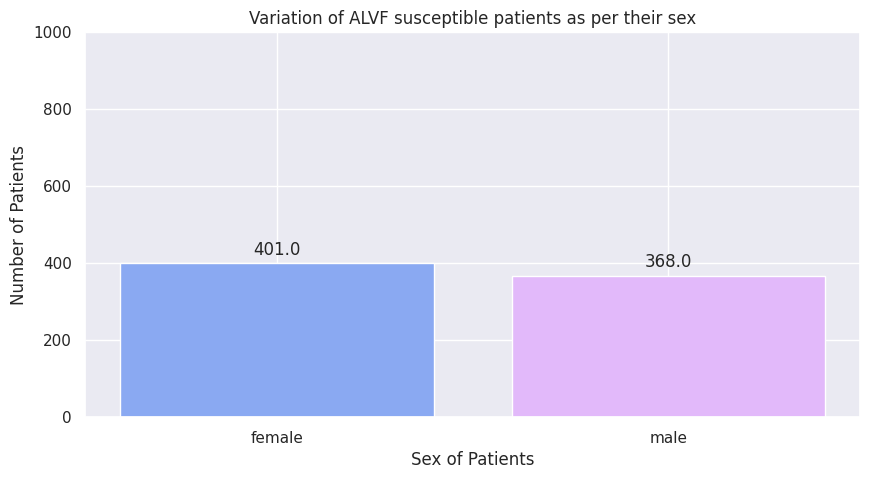

In [ ]:
# finding the variation of ALVF susceptible patients as per their sex
ALVF_df['sex'] = ALVF_df['sex'].astype('category').cat.rename_categories({0: 'female', 1: 'male'})
plt.figure(figsize = (10,5))
bars = plt.bar(ALVF_df.sex.value_counts().keys(),
        ALVF_df.sex.value_counts(),
        color = ["#8aa9f2","#e2b9fa"])
plt.bar_label(bars, padding = 3, fmt = "%.1f")
plt.ylabel("Number of Patients")
plt.xlabel("Sex of Patients")
plt.ylim(0,1000)
plt.title("Variation of ALVF susceptible patients as per their sex")
plt.show()

- Literature regarding ALVF (Bacharova 2023, Wagner 2020, Bergamasco 2022, McDonagh 1997, Raymond 2003,Sara 2020)has suggested:
  - "as age increases the susceptibility to ALVF also increases (overall prevalence in male is still arounf 1.5%, yet this holds true), yet many men at later stages of their life are prone to this than women of the same age range"
  - "Men with ALV systolic dysfunction have more chances of mortality than women with AL Diastolic dysfunction"
  - "prevalence for men at 50 years of age is approx. 4.5% and it goes up abpve 10% if age is above 70 years."
  - "Men have more cases of AL systolic dysfunction whereas women have more cases of diastolic dysfunction."
- **This visusalisation supports the literature evidence.**
- The proportion of male entries is higher than female entries.
- Now we need to analyse the age.

****

*Note: Since we are not considering any cases of Asymptomatic Left Ventricular Diastolic/Systolic Dysfunction, it is suitable to conglomerate both as ALVF.*

/tmp/ipython-input-1819613316.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  HistAge.set_xticklabels(["Male", "Female"])


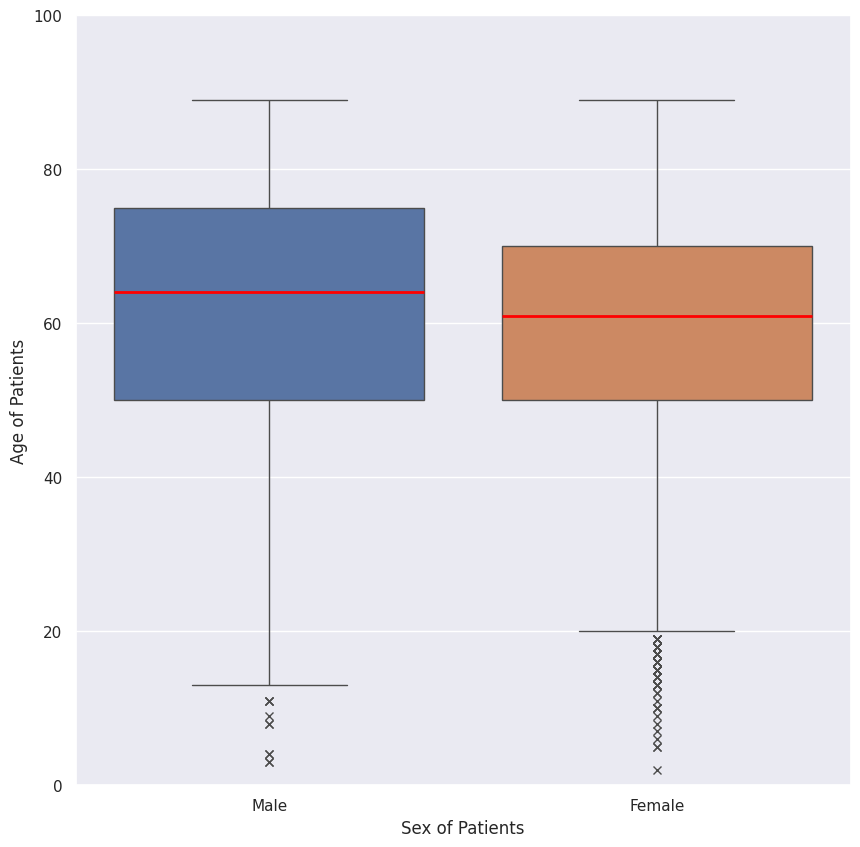

In [ ]:
plt.figure(figsize = (10,10))
HistAge = sns.boxplot([np.array(male), np.array(female)],
                      medianprops = {"color": "red", "linewidth":2},
                      flierprops = {"marker": "x"})
HistAge.set(xlabel = "Sex of Patients", ylabel = "Age of Patients")
HistAge.set_xticklabels(["Male", "Female"])
plt.ylim(0,100)
plt.ylabel("Age of Patients")
plt.xlabel("Sex of Patients")
plt.show()

Still, this barplot is bit ambigious, hence we will dive deep into the EDA using distribution analysis....

<Figure size 1000x1000 with 0 Axes>

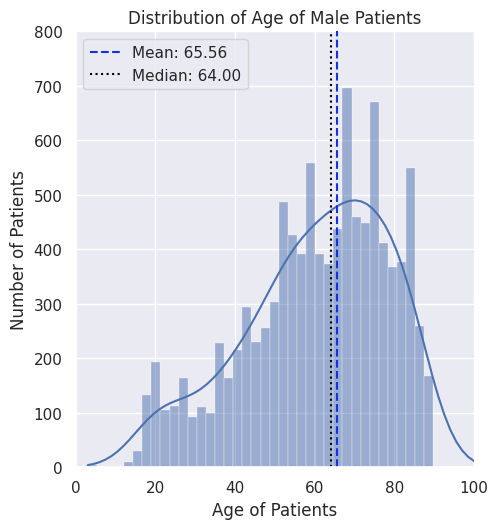

In [ ]:
# Visualising the distribution of Age per male patient
plt.figure(figsize = (10,10))
maledist = sns.displot(np.array(male),
            kde = True)
meanage = np.mean(male)
medianage = np.median(male)
ax = maledist.axes.flatten()[0]
ax.axvline(meanage, linestyle = "--", color = "#1232e6", label = f"Mean: {meanage:.2f}")
ax.axvline(medianage, linestyle = ":", color = "#000000", label = f"Median: {medianage:.2f}")
ax.legend()
plt.xlim(0,100)
plt.ylim(0,800)
plt.ylabel("Number of Patients")
plt.xlabel("Age of Patients")
plt.title("Distribution of Age of Male Patients")
plt.show()

- **Above representation also supports the evidence!**
  - The **rightward negative skew with fairly normal kurtosis** of male age per potential ALVF cases suggests men at later stage of life are more susceptible for such cases.
  - Mean and median age for males <  Mean and median age for females

<Figure size 1000x1000 with 0 Axes>

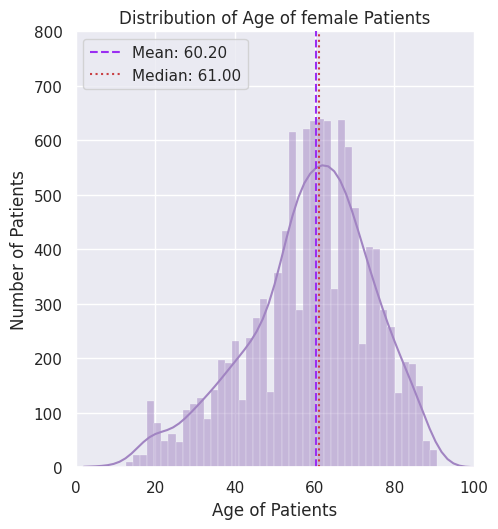

In [ ]:
# Visualising the distribution of Age per female patient
plt.figure(figsize = (10,10))
femaledist = sns.displot(np.array(female),
            kde = True,
            color = "#a184c2")
meanage = np.mean(female)
medianage = np.median(female)
ax = femaledist.axes.flatten()[0]
ax.axvline(meanage, linestyle = "--", color = "#9a2ef2", label = f"Mean: {meanage:.2f}")
ax.axvline(medianage, linestyle = ":", color = "#c94043", label = f"Median: {medianage:.2f}")
ax.legend()
plt.xlim(0,100)
plt.ylim(0,800)
plt.ylabel("Number of Patients")
plt.xlabel("Age of Patients")
plt.title("Distribution of Age of female Patients")
plt.show()

- **Above representation also supports the evidence!**
  - The **slight negative skewing with positive kurtosis** of female age per potential ALVF cases suggests women at later stage of life are less susceptible for such cases.
  - Mean and median age for males <  Mean and median age for females.
  - relatively similar mean and median age.

## **Signal-to-Graph Analysis using WFDB**

### Let's Begin

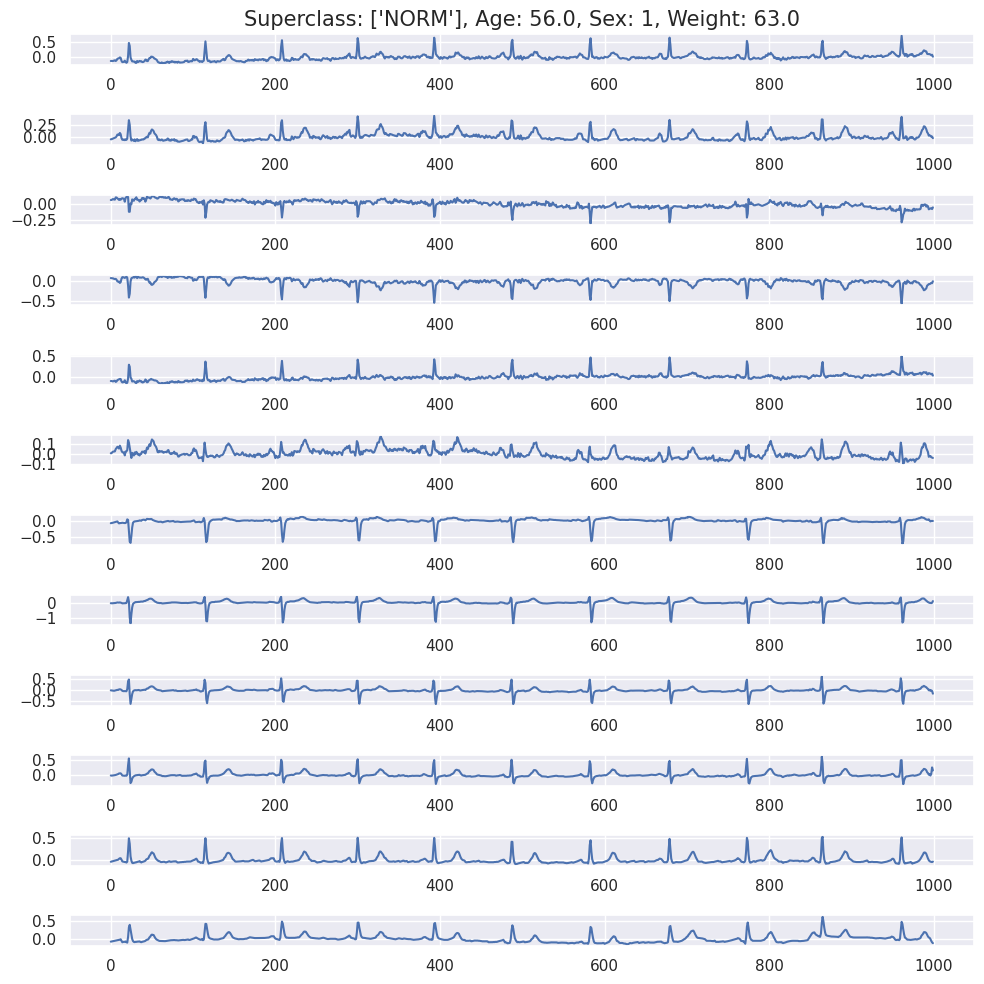

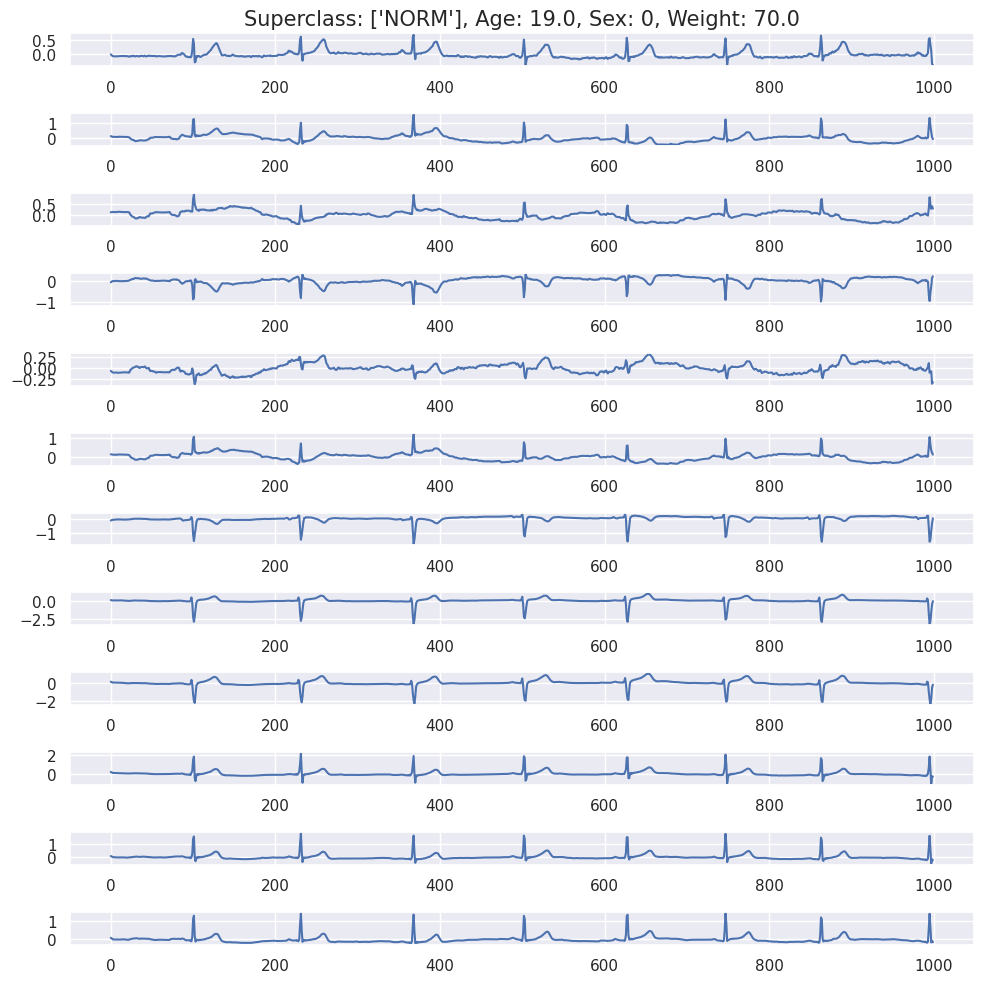

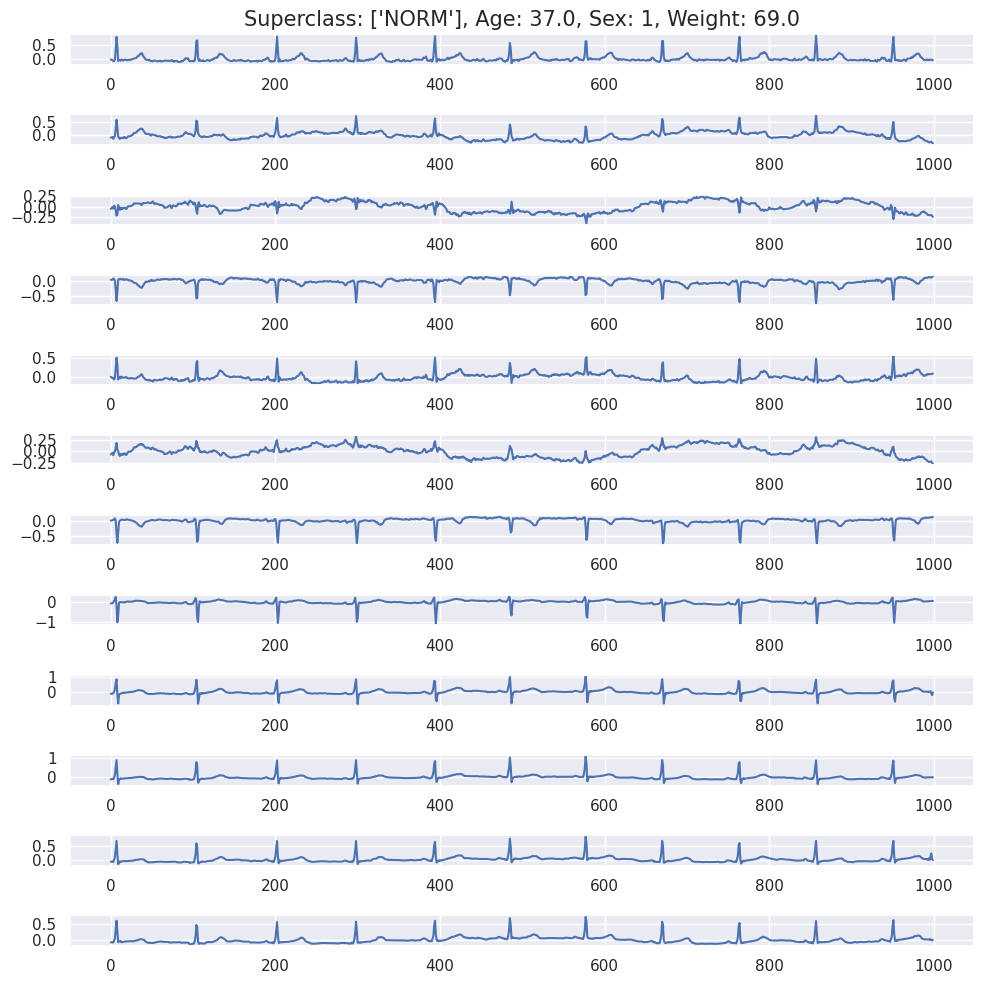

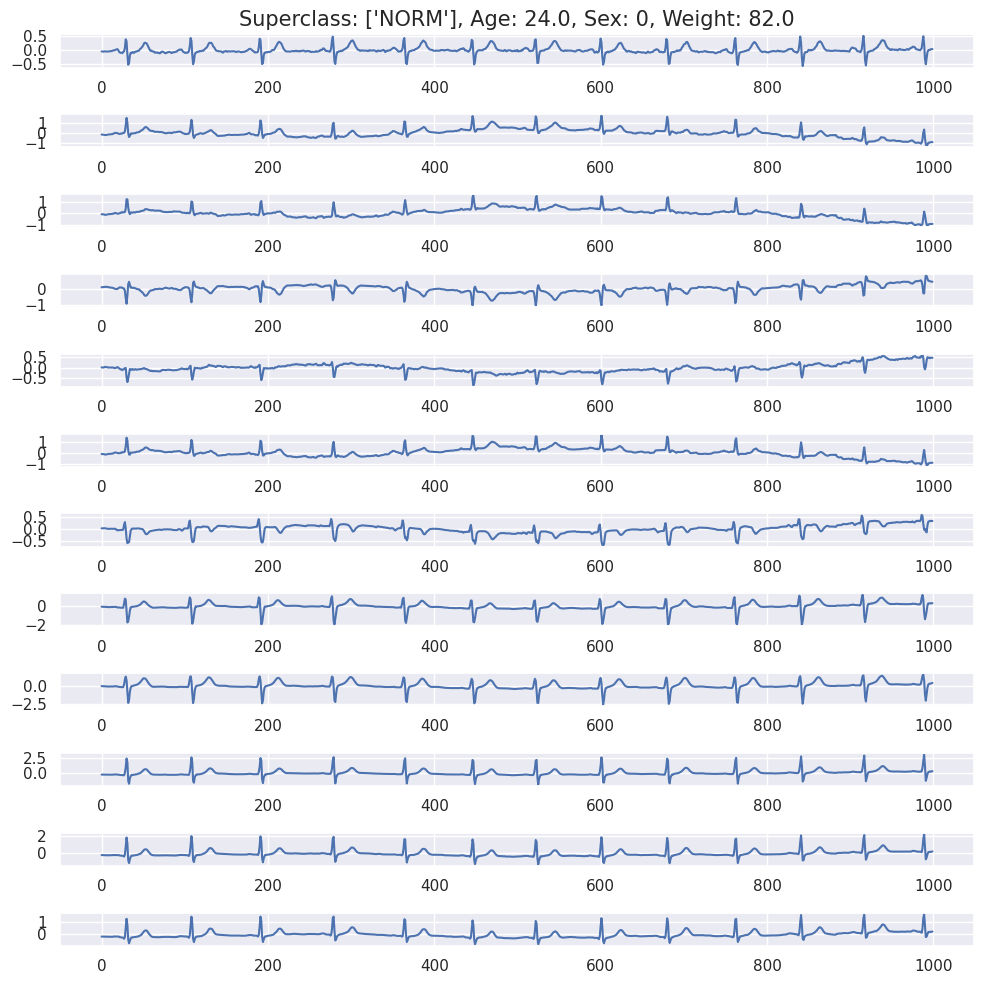

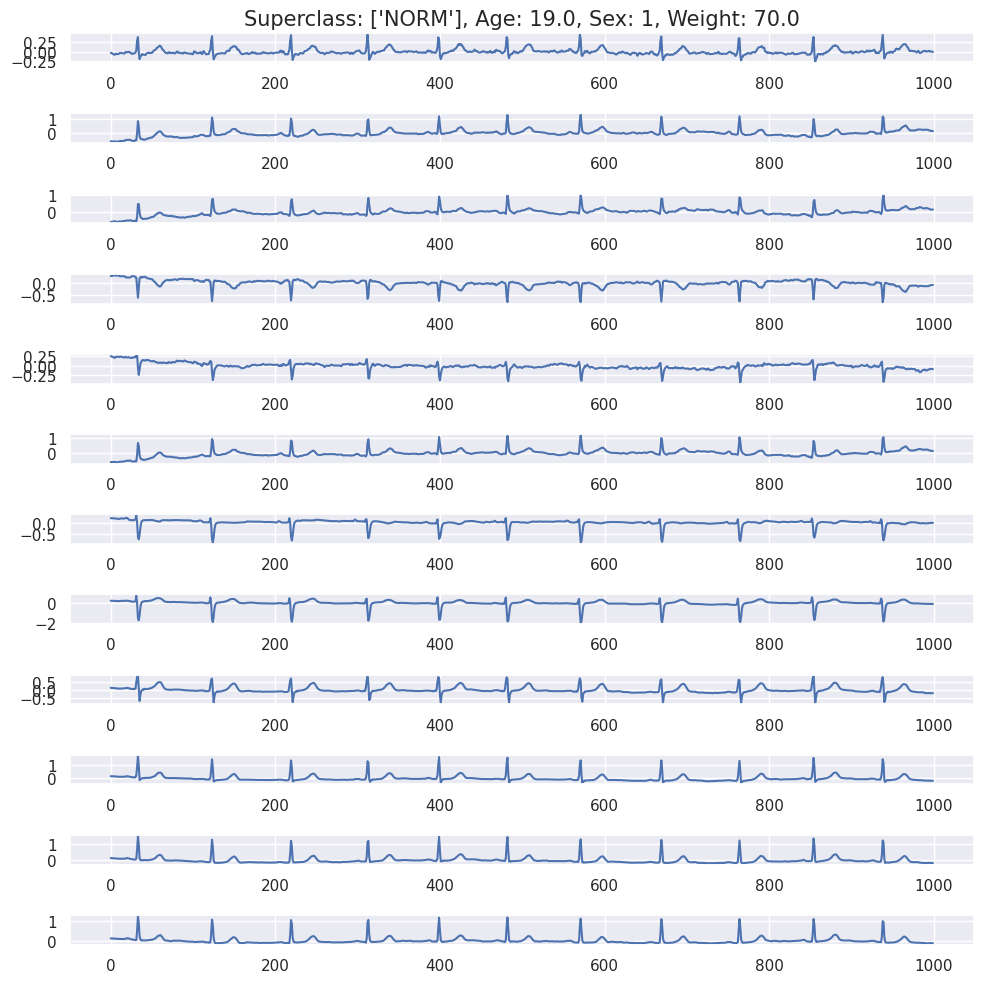

In [ ]:
for entries in range(5): # first five entries

  X_ = X[entries] # one signal
  Y_ = Y.iloc[entries] # one entry

  Bar, Axes = plt.subplots(X_.shape[1], 1, figsize = (10,10)) # define number of subplots and size

  # Set title
  Title = f"Superclass: {Y_.diagnostic_superclass}, Age: {Y_.age}, Sex: {Y_.sex}, Weight: {Y_.weight}"
  Axes[0].set_title(Title, fontsize = 15)

  for c in np.arange(X_.shape[1]): # plot each lead signal in each subplots
    sns.lineplot(x= np.arange(X_.shape[0]),
                 y= X_[:, c],
                 ax= Axes[c])

  plt.tight_layout()
  plt.show()

- First five entries and their signal data has been extracted as an image with specific title.
- Now we have to look at **the comparison between normal and ALVF susceptible entries.**

### ALVF Signals VS Normal Signals: Let's Compare

In [ ]:
LeadLegend = ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6']

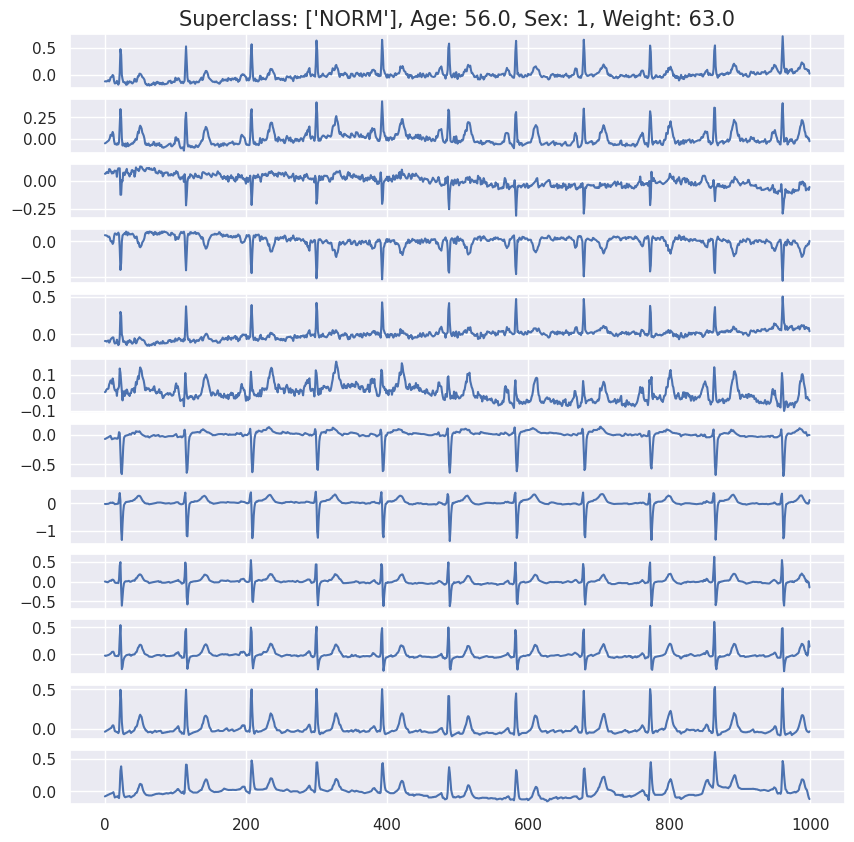

In [ ]:
# Normal patient ECG of 12 leads
X_ = X[0] # one signal
Y_ = Y.iloc[0] # one entry
Bar, Axes = plt.subplots(X_.shape[1], 1, figsize = (10,10)) # define number of subplots and size
# Set title
Title = f"Superclass: {Y_.diagnostic_superclass}, Age: {Y_.age}, Sex: {Y_.sex}, Weight: {Y_.weight}"
Axes[0].set_title(Title, fontsize = 15)
for c in np.arange(X_.shape[1]): # plot each lead signal in each subplots
  sns.lineplot(x= np.arange(X_.shape[0]),
               y= X_[:, c],
               ax= Axes[c])

#plt.tight_layout()
plt.show()

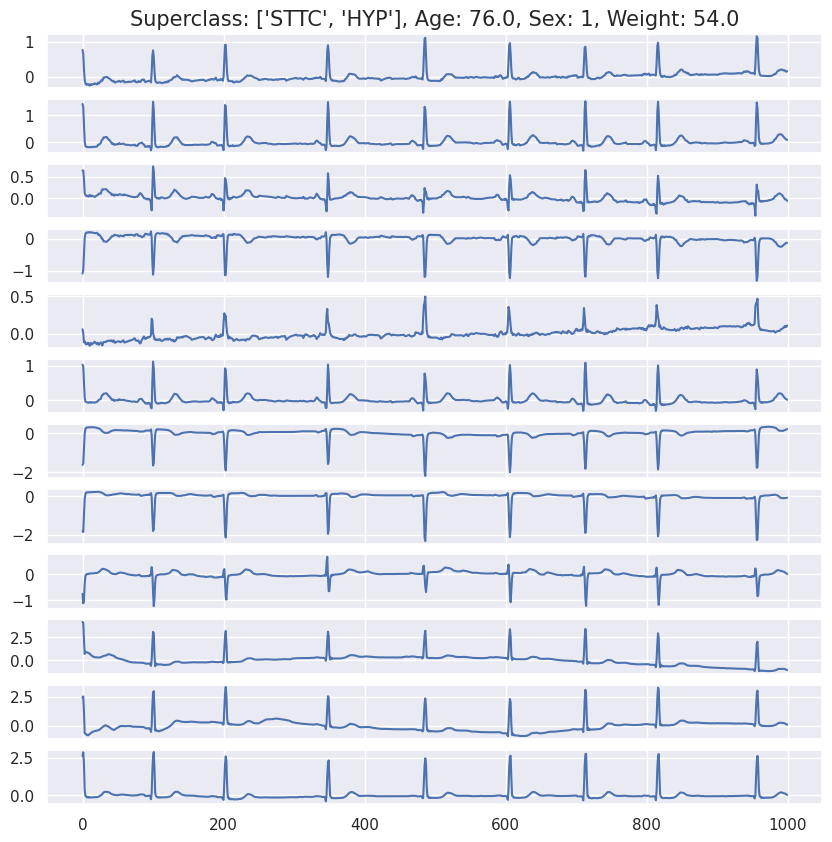

In [ ]:
# ECG of patient susceptible from ALVF
X_ = X[276] # one signal
Y_ = Y.iloc[276] # one entry
Bar, Axes = plt.subplots(X_.shape[1], 1, figsize = (10,10)) # define number of subplots and size
# Set title
Title = f"Superclass: {Y_.diagnostic_superclass}, Age: {Y_.age}, Sex: {Y_.sex}, Weight: {Y_.weight}"
Axes[0].set_title(Title, fontsize = 15)
for c in np.arange(X_.shape[1]): # plot each lead signal in each subplots
  sns.lineplot(x= np.arange(X_.shape[0]),
               y= X_[:, c],
               ax= Axes[c])
plt.show()

**Differences are pretty evident between these two patients for all the leads, hence we can say that the signal data is true to the metadata.**

**CONCLUSION**

- Simple overview revealed that signals are basically numeric arrays representing each individual lead.
- Metadata is connected to the signal data and it can be used for importing it.
- 3.5% (769) people in the entire dataset are susceptible to the ALVF risk.
- Many men are affected by this condition, than anyone else.

****

**NEXT COURSE OF ACTION**

- Wrangle these susceptible entries in main metadata.
- Use attention-based learning to encourage model to focus more on such entries.
- Decide which modality is suitable for futher course.